In [1]:
import pandas as pd
import numpy as np

In [2]:
traindf = pd.read_csv('C:\\Users\\cheek\\ML-7641-Team14\\dataset\output\\dataset_mar_23\\new_train.csv')
valdf = pd.read_csv('C:\\Users\\cheek\\ML-7641-Team14\\dataset\output\\dataset_mar_23\\new_val.csv')

# Duplicate rows check

In [3]:
duplicate_rows = traindf[traindf.duplicated(['video_id'], keep=False)]
duplicate_rows

,video_id,title,publishedAt,channelId,channelTitle,categoryId,cate_0,cate_1,cate_2,cate_3,...,trending_date,tags,views per day,likes per day,dislikes per day,comments per day,thumbnail_link,rating,description,trending


In [4]:
duplicate_rows = valdf[valdf.duplicated(['video_id'], keep=False)]
duplicate_rows

,video_id,title,publishedAt,channelId,channelTitle,categoryId,cate_0,cate_1,cate_2,cate_3,...,trending_date,tags,views per day,likes per day,dislikes per day,comments per day,thumbnail_link,rating,description,trending


# Drop Columns
TDIL Channel title and title are different things

In [7]:
traindf.drop(['channelId','publishedAt', 'trending_date', 'views per day', 'likes per day', 'dislikes per day', 'comments per day', 'thumbnail_link', 'rating','video_id'], axis=1, inplace=True)
valdf.drop(['channelId','publishedAt', 'trending_date', 'views per day', 'likes per day', 'dislikes per day', 'comments per day', 'thumbnail_link', 'rating','video_id'], axis=1, inplace=True)

In [8]:
traindf['lang'] = traindf['title'] + ' ' + traindf['tags'] + ' ' + traindf['description'] + ' ' + traindf['channelTitle']
valdf['lang'] = valdf['title'] + ' ' + valdf['tags'] + ' ' + valdf['description'] + ' ' + valdf['channelTitle']
traindf.drop(['title', 'tags', 'description', 'channelTitle'], axis=1, inplace=True)
valdf.drop(['title', 'tags', 'description', 'channelTitle'], axis=1, inplace=True)

In [9]:
print(traindf.head())
print(valdf.head())

   categoryId  cate_0  cate_1  cate_2  cate_3  cate_4   num_sub  trending  \
0          24       0       0       0       1       1    754000         1   
1          17       1       0       0       0       1    314000         1   
2          22       0       1       1       0       1   1290000         1   
3          22       0       1       1       0       1  10000000         1   
4          26       0       1       0       1       1    145000         0   

                                                lang  
0  Power Book II: Ghost | Official Trailer | Seas...  
1  Julian Newman WENT OFF Against Tristan Jass an...  
2  GET READY WITH US TO GO TO LES DO MAKEUP'S AND...  
3  Binging with Babish: Tater Tots from Breaking ...  
4  My Friend sister Birthday Cake doll cake kaise...  
   categoryId  cate_0  cate_1  cate_2  cate_3  cate_4   num_sub  trending  \
0           2       0       1       0       0       0    511000         1   
1          26       0       1       0       1       1

In [12]:
traindf.drop('categoryId', axis=1, inplace=True)
valdf.drop('categoryId', axis=1, inplace=True)

# Feature Engineering
Cleaning, scaling, normalizing

In [16]:
def lognormalizesubs(df):
    df['log_subs'] = np.log1p(df['num_sub'])

In [17]:
lognormalizesubs(traindf)
lognormalizesubs(valdf)

### Preprocessing the lang

In [18]:
null_count = traindf['lang'].isnull().sum()

In [19]:
null_count

240

In [20]:
print(traindf[traindf['lang'].isnull()])

      cate_0  cate_1  cate_2  cate_3  cate_4  num_sub  trending lang  \
27         0       0       1       1       1   161000         0  NaN   
57         1       1       1       1       0   577000         0  NaN   
68         1       1       0       1       1   143000         0  NaN   
90         0       0       1       1       1   327000         0  NaN   
132        0       1       0       0       0  2370000         0  NaN   
...      ...     ...     ...     ...     ...      ...       ...  ...   
4186       0       0       1       0       1  4720000         1  NaN   
4226       1       1       1       0       1   219000         0  NaN   
4253       0       0       0       1       1    51700         0  NaN   
4281       0       1       0       1       1    79100         0  NaN   
4314       0       0       1       0       1    19700         0  NaN   

       log_subs  
27    11.989166  
57    13.265599  
68    11.870607  
90    12.697719  
132   14.678401  
...         ...  
4186  15.

In [21]:
traindf.dropna(subset=['lang'], inplace=True)
valdf.dropna(subset=['lang'], inplace=True)

In [22]:
traindf = traindf.reset_index(drop=True)
valdf = valdf.reset_index(drop=True)

In [23]:
smallest_lang_value = min(traindf['lang'], key=lambda x: len(x))
print(smallest_lang_value)

Human elevator [none] #parkour Oliver Nordin


In [24]:
import string
import re
import nltk
nltk.data.path.append('C:/Users/cheek/ML-7641-Team14/shravan/nltk_data')
stopwords = nltk.corpus.stopwords.words('english')

In [25]:
max_length = traindf['lang'].apply(len).max()
print(max_length)

5510


In [26]:
max_length_index = traindf['lang'].str.len().idxmax()
row_with_max_length = traindf.loc[max_length_index]
row_with_max_length.apply(lambda x: print(x))

1
0
0
0
0
323000
0
Robot 3.0 Full Movie HD | Rajnikant  | Katrina Kaif | Shankar | 2023 | Full  Sci-Fi Movie in Hindi | 3.0 full movie|3.0 full movie in tamil|2.0 full movie|3.0 full movie in hindi|robot 3.0 movie|3.0 in 2.0 movie|3.0 rajinikanth|3.0 trailer tamil|salman in 3.0 movie|2.0 movie|3.0 trailer|robot 3.0 full movie|robot 3.0 trailer full movie|robot 3.0 movies|full movie 2.0|3.0 rajinikanth tamil|3.0 rajinikanth hindi|2.0 full movie in hindi|robot 3.0|full movie|robot 3.0 full hd movie|rajnikant new movie|new south movie 2023|robot #robot3  #AkshayKumar #ShankarRobot 3.0 Full Movie HD | Rajnikant  | Katrina Kaif | Shankar | 2023 | Full  Sci-Fi Movie in Hindi |After a decade of research, scientist Vaseegaran creates a sophisticated android humanoid robot with the help of his assistants, Siva and Ravi, in order to commission it into the Indian Army. He introduces the robot, named Chitti, at a robotics conference in Chennai. Chitti helps Sana, Vaseegaran's medical student girlf

cate_0      None
cate_1      None
cate_2      None
cate_3      None
cate_4      None
num_sub     None
trending    None
lang        None
log_subs    None
Name: 1949, dtype: object

In [27]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [41]:
from gensim.models import KeyedVectors
import gensim.downloader as api

In [42]:
wv = api.load('word2vec-google-news-300')

In [43]:
wv.save('vectors')

In [44]:
wv2 = KeyedVectors.load('C:\\Users\\cheek\\ML-7641-Team14\\shravan\\newdatatry\\vectors', mmap='r')

In [47]:
wv.similarity('apple', 'airplane')

0.19884725

In [48]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct or (token.text not in wv.key_to_index):
            continue
        filtered_tokens.append(token.lemma_)
        
    return filtered_tokens

In [49]:
def vectorize(filtered):
    return wv.get_mean_vector(filtered)

In [50]:
traindf['tokens'] = traindf['lang'].apply(lambda x: preprocess(x))
traindf['vector'] = traindf['tokens'].apply(lambda x: vectorize(x))

In [51]:
valdf['tokens'] = valdf['lang'].apply(lambda x: preprocess(x))
valdf['vector'] = valdf['tokens'].apply(lambda x: vectorize(x))

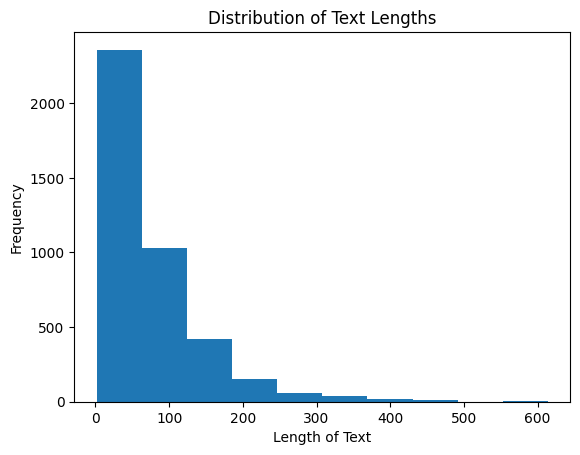

In [32]:
lengths = traindf['tokens'].apply(len)

plt.hist(lengths, bins=10)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

# Seperate prediction - y

In [52]:
y_train = traindf['trending']
y_val = valdf['trending']

In [53]:
X_train = np.stack(traindf['vector'])
X_test = np.stack(valdf['vector'])

In [35]:
X_train.shape

(4084, 300)

# Training w/ np array

In [68]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [37]:
traindf.columns

Index(['categoryId', 'num_sub', 'trending', 'lang', 'log_subs', 'tokens',
       'vector'],
      dtype='object')

In [39]:
# Train SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("SVM:")
print(confusion_matrix(y_val, svm_pred))
print(classification_report(y_val, svm_pred))
print("Accuracy:", accuracy_score(y_val, svm_pred))

SVM:
[[364 129]
 [ 62 449]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       493
           1       0.78      0.88      0.82       511

    accuracy                           0.81      1004
   macro avg       0.82      0.81      0.81      1004
weighted avg       0.81      0.81      0.81      1004

Accuracy: 0.8097609561752988


In [40]:
# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print(rf_model.feature_importances_)

print("Random Forest:")
print(confusion_matrix(y_val, rf_pred))
print(classification_report(y_val, rf_pred))
print("Accuracy:", accuracy_score(y_val, rf_pred))

[0.00355803 0.00543375 0.00319439 0.00254509 0.00365634 0.00244131
 0.0090236  0.00271126 0.00223186 0.00263739 0.00291535 0.00206031
 0.00220198 0.00322662 0.00691444 0.00261035 0.0109483  0.00253622
 0.00195049 0.00296411 0.00260842 0.00526372 0.00289789 0.00312632
 0.0027693  0.00252654 0.00224129 0.00253898 0.00351668 0.0025837
 0.00336795 0.00277923 0.00252329 0.00968639 0.00308218 0.00257726
 0.0037974  0.0030189  0.00537861 0.00247077 0.00246176 0.00321451
 0.00220243 0.0021612  0.00508909 0.00310649 0.00246513 0.00255369
 0.0036425  0.00251899 0.00370032 0.00236715 0.00263932 0.00295895
 0.00232493 0.00278767 0.0026882  0.00253686 0.00412155 0.00320886
 0.00247514 0.00254455 0.00288929 0.00315362 0.00458111 0.00697373
 0.0039779  0.00217482 0.00272646 0.00303932 0.00365375 0.00260584
 0.00327206 0.00206267 0.00192779 0.00359557 0.00435403 0.00216469
 0.00256208 0.00194505 0.00732891 0.00574113 0.00256751 0.00354073
 0.00236621 0.00508629 0.00315764 0.001687   0.00414647 0.00199

In [41]:
# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Logistic Regression:")
print(confusion_matrix(y_val, lr_pred))
print(classification_report(y_val, lr_pred))
print("Accuracy:", accuracy_score(y_val, lr_pred))

Logistic Regression:
[[348 145]
 [ 82 429]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.75       493
           1       0.75      0.84      0.79       511

    accuracy                           0.77      1004
   macro avg       0.78      0.77      0.77      1004
weighted avg       0.78      0.77      0.77      1004

Accuracy: 0.7739043824701195


# NN

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [82]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
       # x = torch.sigmoid(x)
        return x.squeeze()

In [44]:
class AdvancedNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(AdvancedNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5)
        )
        
        self.layer2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5)
        )
        
        self.layer3 = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.5)
        )
        
        self.layer4 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return x

In [102]:
train_data = torch.tensor(X_train, dtype=torch.float)
train_labels = torch.tensor(y_train, dtype=torch.long)
val_data = torch.tensor(X_test, dtype=torch.float)
val_labels = torch.tensor(y_val, dtype=torch.long)

train_dataset = TensorDataset(train_data, train_labels)
val_dataset = TensorDataset(val_data, val_labels)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [46]:
input_size = 300
num_classes = 2
#model = SimpleNN(input_size, num_classes)
model = AdvancedNN(input_size, num_classes)

learning_rate = 0.001
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_dataloader)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}")

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = running_loss / len(val_dataloader)
    val_accuracy = correct / total
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

Epoch 1, Train Loss: 0.6056628671940416
Epoch 1, Validation Loss: 0.49025419633835554, Validation Accuracy: 0.7729083665338645
Epoch 2, Train Loss: 0.5142706767655909
Epoch 2, Validation Loss: 0.46821191534399986, Validation Accuracy: 0.7858565737051793
Epoch 3, Train Loss: 0.47563710855320096
Epoch 3, Validation Loss: 0.4596212236210704, Validation Accuracy: 0.796812749003984
Epoch 4, Train Loss: 0.4550440111197531
Epoch 4, Validation Loss: 0.4551769308745861, Validation Accuracy: 0.8117529880478087
Epoch 5, Train Loss: 0.45030693570151925
Epoch 5, Validation Loss: 0.44979717675596476, Validation Accuracy: 0.8047808764940239
Epoch 6, Train Loss: 0.4342188936425373
Epoch 6, Validation Loss: 0.47628355026245117, Validation Accuracy: 0.7798804780876494
Epoch 7, Train Loss: 0.43260300694964826
Epoch 7, Validation Loss: 0.4632433708757162, Validation Accuracy: 0.796812749003984
Epoch 8, Train Loss: 0.4298697040649131
Epoch 8, Validation Loss: 0.47927119163796306, Validation Accuracy: 0.800

# Training with df

Pretty much using some other features

In [54]:
Xdf_train = pd.DataFrame(X_train)

In [55]:
Xdf_test = pd.DataFrame(X_test)

In [56]:
Xdf_train

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.037324,0.001781,-0.010999,-0.014390,0.008327,0.015050,0.002750,-0.008287,0.029170,0.022423,...,0.003419,-0.012605,-0.054438,-0.011793,0.005213,-0.040189,-0.019612,-0.008356,-0.002161,0.007417
1,0.027126,0.018631,-0.043199,0.010921,0.018408,-0.020090,-0.002293,-0.030937,0.034213,0.029412,...,0.007731,-0.007100,-0.046828,0.010370,-0.013127,-0.034672,0.009649,-0.016757,0.003185,0.016839
2,-0.009290,0.001580,0.041077,0.008362,-0.016564,0.003744,-0.026991,-0.025944,-0.042773,0.002404,...,0.015814,0.007675,-0.038544,0.036608,-0.013988,-0.077762,-0.036571,-0.003778,-0.001089,0.016832
3,0.014575,-0.001549,-0.016263,0.012496,0.005753,0.014698,0.013166,-0.024183,0.035358,-0.003001,...,0.006662,0.015656,-0.055904,0.013691,0.000369,-0.021446,0.012411,-0.036735,0.013220,-0.000223
4,-0.015717,-0.038114,-0.004080,0.052129,0.016092,0.027980,0.015357,-0.033920,0.002469,0.001617,...,-0.030791,0.005275,-0.059791,-0.014414,0.000138,-0.041190,0.003861,-0.003530,-0.041935,-0.014488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,0.001493,-0.006056,-0.006911,-0.004492,-0.012382,-0.018271,0.001261,-0.026307,-0.012953,0.005960,...,0.003202,-0.002476,-0.053833,0.027181,-0.010399,-0.015832,0.001375,-0.007146,0.016459,0.012746
4080,0.010417,-0.007499,-0.008978,0.032899,-0.010673,-0.002196,0.014975,-0.008162,0.000760,-0.001148,...,0.004064,0.029870,-0.041622,-0.010662,-0.011063,-0.028395,0.003778,-0.045244,0.007093,0.001836
4081,0.001642,0.008861,-0.028481,0.004189,-0.002797,0.015856,0.023422,-0.019607,0.038859,0.017187,...,-0.015455,-0.004521,-0.024251,-0.005403,0.007940,-0.032007,0.002156,-0.022578,0.020213,-0.022701
4082,0.003536,-0.032019,-0.030158,0.042114,-0.038139,-0.043196,-0.026681,-0.053684,0.019157,-0.021900,...,0.001806,0.008763,-0.097177,-0.022242,0.010019,0.001093,0.010236,0.016268,-0.007597,0.017021


In [57]:
traindf.columns

Index(['cate_0', 'cate_1', 'cate_2', 'cate_3', 'cate_4', 'num_sub', 'trending',
       'lang', 'log_subs', 'tokens', 'vector'],
      dtype='object')

In [60]:
trdf = traindf[['cate_0', 'cate_1', 'cate_2', 'cate_3', 'cate_4', 'log_subs']]

In [67]:
traindf

,categoryId,num_sub,trending,lang,log_subs,tokens,vector
0,24,754000,1,Power Book II: Ghost | Official Trailer | Seas...,13.533149,"[Power, Book, II, ghost, official, Trailer, Se...","[0.03732416, 0.0017805065, -0.010998716, -0.01..."
1,17,314000,1,Julian Newman WENT OFF Against Tristan Jass an...,12.657151,"[Julian, Newman, go, Tristan, Jass, Carson, Ro...","[0.027126025, 0.018631326, -0.04319948, 0.0109..."
2,22,1290000,1,GET READY WITH US TO GO TO LES DO MAKEUP'S AND...,14.070154,"[ready, LES, MAKEUP, KB, EVENT, Murillo, SOCIA...","[-0.0092903115, 0.0015797918, 0.041077197, 0.0..."
3,22,10000000,1,Binging with Babish: Tater Tots from Breaking ...,16.118096,"[binge, Babish, Tater, Tots, break, bad, episo...","[0.014575143, -0.0015489127, -0.016263451, 0.0..."
4,26,145000,0,My Friend sister Birthday Cake doll cake kaise...,11.884496,"[friend, sister, Birthday, Cake, doll, cake, k...","[-0.015716612, -0.038114376, -0.0040804143, 0...."
...,...,...,...,...,...,...,...
4079,10,7960,1,Aaron Mercury - Apaga La Luz Aaron|Mercury|Apa...,8.982310,"[Aaron, Mercury, La, Luz, music, video, Aaron,...","[0.0014932244, -0.006056428, -0.0069105057, -0..."
4080,20,934000,0,Sonic And Amy Funny Dance - Sonic And Amy Stor...,13.747233,"[sonic, Amy, Funny, dance, Sonic, Amy, Story, ...","[0.010417218, -0.007498604, -0.008977798, 0.03..."
4081,2,12800,0,Check This Out! Custom Skoolie Exterior Tour!...,9.457279,"[check, Custom, Exterior, Tour, travel, tour, ...","[0.0016421076, 0.008860779, -0.028481334, 0.00..."
4082,22,33100,0,Viral aiya susanti #shorts drako|drama lucu|fu...,10.407319,"[viral, short, Drama]","[0.0035358805, -0.032018986, -0.030157546, 0.0..."


In [61]:
trdf

,cate_0,cate_1,cate_2,cate_3,cate_4,log_subs
0,0,0,0,1,1,13.533149
1,1,0,0,0,1,12.657151
2,0,1,1,0,1,14.070154
3,0,1,1,0,1,16.118096
4,0,1,0,1,1,11.884496
...,...,...,...,...,...,...
4079,0,1,0,1,0,8.982310
4080,0,0,1,0,1,13.747233
4081,0,1,0,0,0,9.457279
4082,0,1,1,0,1,10.407319


In [62]:
tedf = valdf[['cate_0', 'cate_1', 'cate_2', 'cate_3', 'cate_4', 'log_subs']]

In [63]:
resultTrain = pd.concat([Xdf_train, trdf], axis=1, sort=False)
resultTest = pd.concat([Xdf_test, tedf], axis=1, sort=False)

In [64]:
resultTrain

,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,cate_0,cate_1,cate_2,cate_3,cate_4,log_subs
0,0.037324,0.001781,-0.010999,-0.014390,0.008327,0.015050,0.002750,-0.008287,0.029170,0.022423,...,-0.019612,-0.008356,-0.002161,0.007417,0,0,0,1,1,13.533149
1,0.027126,0.018631,-0.043199,0.010921,0.018408,-0.020090,-0.002293,-0.030937,0.034213,0.029412,...,0.009649,-0.016757,0.003185,0.016839,1,0,0,0,1,12.657151
2,-0.009290,0.001580,0.041077,0.008362,-0.016564,0.003744,-0.026991,-0.025944,-0.042773,0.002404,...,-0.036571,-0.003778,-0.001089,0.016832,0,1,1,0,1,14.070154
3,0.014575,-0.001549,-0.016263,0.012496,0.005753,0.014698,0.013166,-0.024183,0.035358,-0.003001,...,0.012411,-0.036735,0.013220,-0.000223,0,1,1,0,1,16.118096
4,-0.015717,-0.038114,-0.004080,0.052129,0.016092,0.027980,0.015357,-0.033920,0.002469,0.001617,...,0.003861,-0.003530,-0.041935,-0.014488,0,1,0,1,1,11.884496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,0.001493,-0.006056,-0.006911,-0.004492,-0.012382,-0.018271,0.001261,-0.026307,-0.012953,0.005960,...,0.001375,-0.007146,0.016459,0.012746,0,1,0,1,0,8.982310
4080,0.010417,-0.007499,-0.008978,0.032899,-0.010673,-0.002196,0.014975,-0.008162,0.000760,-0.001148,...,0.003778,-0.045244,0.007093,0.001836,0,0,1,0,1,13.747233
4081,0.001642,0.008861,-0.028481,0.004189,-0.002797,0.015856,0.023422,-0.019607,0.038859,0.017187,...,0.002156,-0.022578,0.020213,-0.022701,0,1,0,0,0,9.457279
4082,0.003536,-0.032019,-0.030158,0.042114,-0.038139,-0.043196,-0.026681,-0.053684,0.019157,-0.021900,...,0.010236,0.016268,-0.007597,0.017021,0,1,1,0,1,10.407319


In [65]:
resultTrain.columns = resultTrain.columns.astype(str)
resultTest.columns = resultTest.columns.astype(str)

In [66]:
resultTrain

,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,cate_0,cate_1,cate_2,cate_3,cate_4,log_subs
0,0.037324,0.001781,-0.010999,-0.014390,0.008327,0.015050,0.002750,-0.008287,0.029170,0.022423,...,-0.019612,-0.008356,-0.002161,0.007417,0,0,0,1,1,13.533149
1,0.027126,0.018631,-0.043199,0.010921,0.018408,-0.020090,-0.002293,-0.030937,0.034213,0.029412,...,0.009649,-0.016757,0.003185,0.016839,1,0,0,0,1,12.657151
2,-0.009290,0.001580,0.041077,0.008362,-0.016564,0.003744,-0.026991,-0.025944,-0.042773,0.002404,...,-0.036571,-0.003778,-0.001089,0.016832,0,1,1,0,1,14.070154
3,0.014575,-0.001549,-0.016263,0.012496,0.005753,0.014698,0.013166,-0.024183,0.035358,-0.003001,...,0.012411,-0.036735,0.013220,-0.000223,0,1,1,0,1,16.118096
4,-0.015717,-0.038114,-0.004080,0.052129,0.016092,0.027980,0.015357,-0.033920,0.002469,0.001617,...,0.003861,-0.003530,-0.041935,-0.014488,0,1,0,1,1,11.884496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,0.001493,-0.006056,-0.006911,-0.004492,-0.012382,-0.018271,0.001261,-0.026307,-0.012953,0.005960,...,0.001375,-0.007146,0.016459,0.012746,0,1,0,1,0,8.982310
4080,0.010417,-0.007499,-0.008978,0.032899,-0.010673,-0.002196,0.014975,-0.008162,0.000760,-0.001148,...,0.003778,-0.045244,0.007093,0.001836,0,0,1,0,1,13.747233
4081,0.001642,0.008861,-0.028481,0.004189,-0.002797,0.015856,0.023422,-0.019607,0.038859,0.017187,...,0.002156,-0.022578,0.020213,-0.022701,0,1,0,0,0,9.457279
4082,0.003536,-0.032019,-0.030158,0.042114,-0.038139,-0.043196,-0.026681,-0.053684,0.019157,-0.021900,...,0.010236,0.016268,-0.007597,0.017021,0,1,1,0,1,10.407319


In [69]:
svm_model = SVC()
svm_model.fit(resultTrain, y_train)
svm_pred = svm_model.predict(resultTest)

print("SVM:")
print(confusion_matrix(y_val, svm_pred))
print(classification_report(y_val, svm_pred))
print("Accuracy:", accuracy_score(y_val, svm_pred))

SVM:
[[252 241]
 [ 92 419]]
              precision    recall  f1-score   support

           0       0.73      0.51      0.60       493
           1       0.63      0.82      0.72       511

    accuracy                           0.67      1004
   macro avg       0.68      0.67      0.66      1004
weighted avg       0.68      0.67      0.66      1004

Accuracy: 0.6683266932270916


In [70]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

model = lgb.train(params, train_data, num_boost_round=100)

y_pred = model.predict(X_test)

mse = ((y_pred - y_val) ** 2).mean()
rmse = mse ** 0.5
print('Root mean squared error:', rmse)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76500
[LightGBM] [Info] Number of data points in the train set: 4084, number of used features: 300
[LightGBM] [Info] Start training from score 0.531097
Root mean squared error: 0.3943196017275116


In [71]:
train_data = lgb.Dataset(resultTrain, label=y_train)

model = lgb.train(params, train_data, num_boost_round=100)

y_pred = model.predict(resultTest)

mse = ((y_pred - y_val) ** 2).mean()
rmse = mse ** 0.5
print('Root mean squared error:', rmse)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76763
[LightGBM] [Info] Number of data points in the train set: 4084, number of used features: 306
[LightGBM] [Info] Start training from score 0.531097
Root mean squared error: 0.37775378077938404


In [115]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X.iloc[idx].values, dtype=torch.float), torch.tensor(self.y.iloc[idx], dtype=torch.long)

In [120]:
input_size = resultTrain.shape[1]

train_dataset = CustomDataset(resultTrain, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = CustomDataset(resultTest, y_val)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

In [121]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.leaky_relu(x, negative_slope=0.01)
        x = torch.sigmoid(x)
        return x

In [122]:
model = SimpleNN(input_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

num_epochs = 35
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels.squeeze())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_dataloader)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}")

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels.squeeze())
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.squeeze()).sum().item()

    val_loss = running_loss / len(val_dataloader)
    val_accuracy = correct / total
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

Epoch 1, Train Loss: 0.6903237160295248
Epoch 1, Validation Loss: 0.6920876186341047, Validation Accuracy: 0.5089641434262948
Epoch 2, Train Loss: 0.6882166746072471
Epoch 2, Validation Loss: 0.6894653402268887, Validation Accuracy: 0.5109561752988048
Epoch 3, Train Loss: 0.6819381746463478
Epoch 3, Validation Loss: 0.6905853264033794, Validation Accuracy: 0.5268924302788844
Epoch 4, Train Loss: 0.6688341968692839
Epoch 4, Validation Loss: 0.6697787996381521, Validation Accuracy: 0.5946215139442231
Epoch 5, Train Loss: 0.675971454475075
Epoch 5, Validation Loss: 0.6726722903549671, Validation Accuracy: 0.5966135458167331
Epoch 6, Train Loss: 0.674051676876843
Epoch 6, Validation Loss: 0.6765123140066862, Validation Accuracy: 0.5826693227091634
Epoch 7, Train Loss: 0.6702292459085584
Epoch 7, Validation Loss: 0.6861137095838785, Validation Accuracy: 0.5517928286852589
Epoch 8, Train Loss: 0.6876040799543262
Epoch 8, Validation Loss: 0.6987478081136942, Validation Accuracy: 0.49103585657

In [123]:
resultTest['log_subs'].describe()

count    1004.000000
mean       14.151494
std         2.160089
min         6.018593
25%        12.936036
50%        14.496076
75%        15.792363
max        19.291974
Name: log_subs, dtype: float64